# Let's Cluster some Credit Cards!
In this notebook we will try to cluster some credit cards. We will go through preprocessing, choose a model and train it on our data, and then evaluate our outcomes.

The dataset you will use is `Credit Card Dataset.csv`

# Libraries

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [165]:
df = pd.read_csv('/content/Credit Card Dataset.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# EDA
Explore the Dataset Perform initial exploration of your dataset. Understand the features and the distribution of data.

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [167]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [168]:
df.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


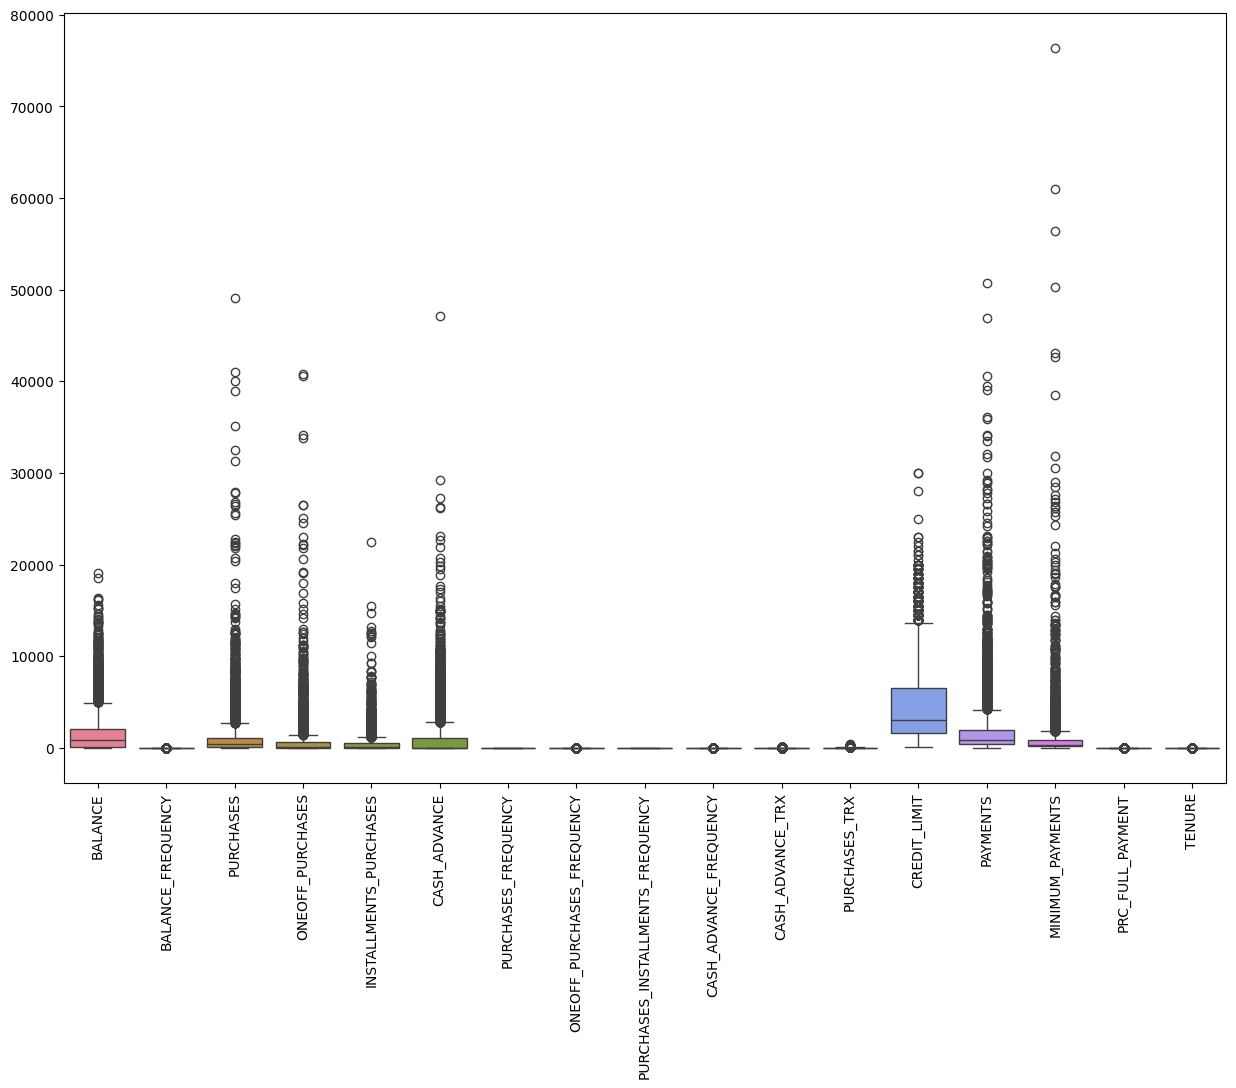

In [169]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

# Preprocessing
1. Remove the outliers
2. Impute missing data
3. Scale the data
4. Reduce dimentions using PCA

In [170]:
df=df.drop('CUST_ID',axis=1) #Id is unieq and its not helpful in the model

In [171]:
threshold = 0.9

# Find pairs of highly correlated features
high_correlation = (correlation_matrix.abs() > threshold) & (correlation_matrix.abs() < 1)
high_correlation_pairs = high_correlation.stack()
high_correlation_pairs = high_correlation_pairs[high_correlation_pairs]

print(high_correlation_pairs)


PURCHASES_FREQUENCY               PURCHASES_INSTALLMENTS_FREQUENCY    True
PURCHASES_INSTALLMENTS_FREQUENCY  PURCHASES_FREQUENCY                 True
CASH_ADVANCE_FREQUENCY            CASH_ADVANCE_TRX                    True
CASH_ADVANCE_TRX                  CASH_ADVANCE_FREQUENCY              True
dtype: bool


In [143]:
# Dropping features based on correlation results
features_to_drop = [
    'PURCHASES_INSTALLMENTS_FREQUENCY',
    'CASH_ADVANCE_TRX'
]

df = df.drop(columns=features_to_drop)

In [144]:
df[df>30000].count() #I will consedr it as a outlier and i find it in the EDA Sectiun

,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,7
ONEOFF_PURCHASES,4
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,1
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
CASH_ADVANCE_FREQUENCY,0
PURCHASES_TRX,0


In [172]:
df = df[~(df > 30000).any(axis=1)]


In [173]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_filtered = df[~((df[column] < lower_bound) | (df[column] > upper_bound))]
    return df_filtered

for column in df.columns:
    df = remove_outliers(df, column)

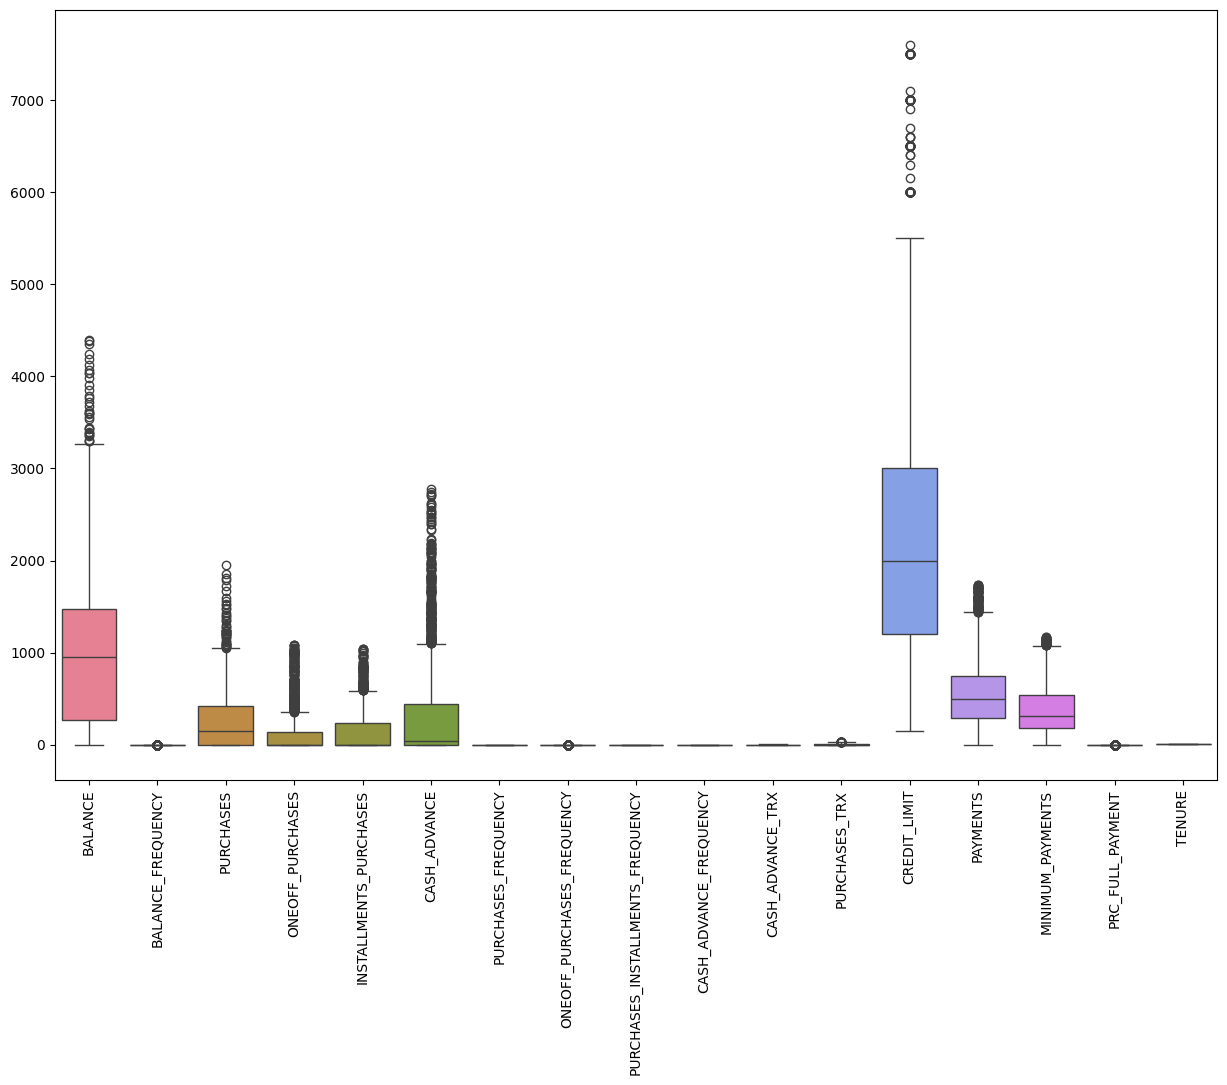

In [174]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [175]:
df['MINIMUM_PAYMENTS']=df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean())

In [149]:
df['CREDIT_LIMIT']=df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean())

In [176]:
df.isnull().sum()

,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0
CASH_ADVANCE_FREQUENCY,0


In [177]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scale the data
df_scaled= scaler.fit_transform(df)

#### Dimention Reduction using PCA
K-means, DBSCAN and agglomerative clustering, all use the Euclidean distance, which starts to lose its meaning when the number of dimensions starts increasing. so, before using these methods, we have to reduce the number of dimensions. We are going to use PCA, which is by far the most popular dimensionality reduction algorithm.

Please set the parameter `n_components` equals to 0.9, which means that the PCA will automatically produce enough PCs that will preserve 90% of variance in the dataset.

In [178]:
from sklearn.decomposition import PCA
n=0.9
pca = PCA(n_components=n)
df_pca = pca.fit_transform(df_scaled)

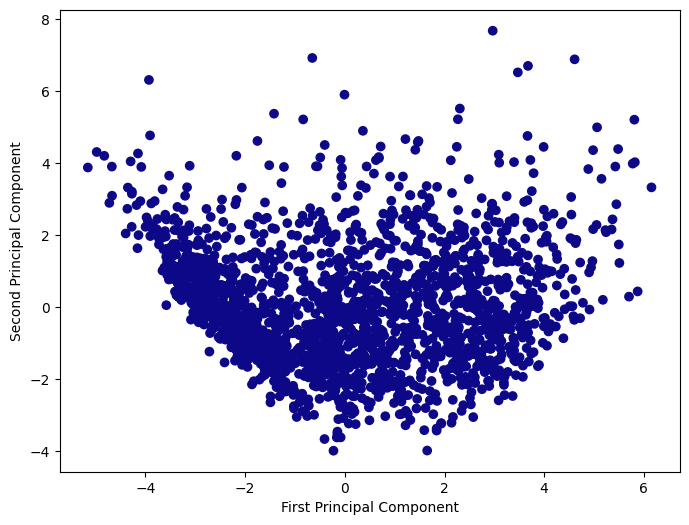

In [179]:
# giving a larger plot
plt.figure(figsize=(8, 6))

plt.scatter(df_pca[:, 0], df_pca[:, 1],
            c=df['TENURE'],
            cmap='plasma')

# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [197]:
df_pca.shape


(2074, 8)

# Train the Model
Now that we have done the preprocessing step, we can perform K-means clustering on the data.

* Find the `n_clusters` parameter using the elbow method.
* Train the model.

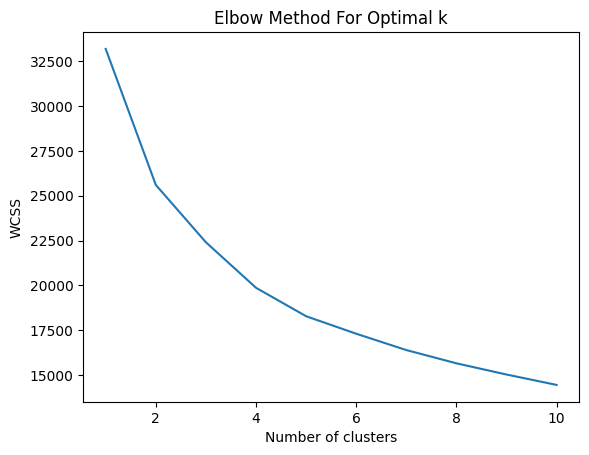

In [191]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [204]:
optimal_k =3

kmeans = KMeans(n_clusters=optimal_k, max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(df_scaled)

# Add the cluster labels to the original DataFrame
df['Cluster'] = clusters

In [205]:
labels


array([0, 0, 1, ..., 0, 1, 1], dtype=int32)

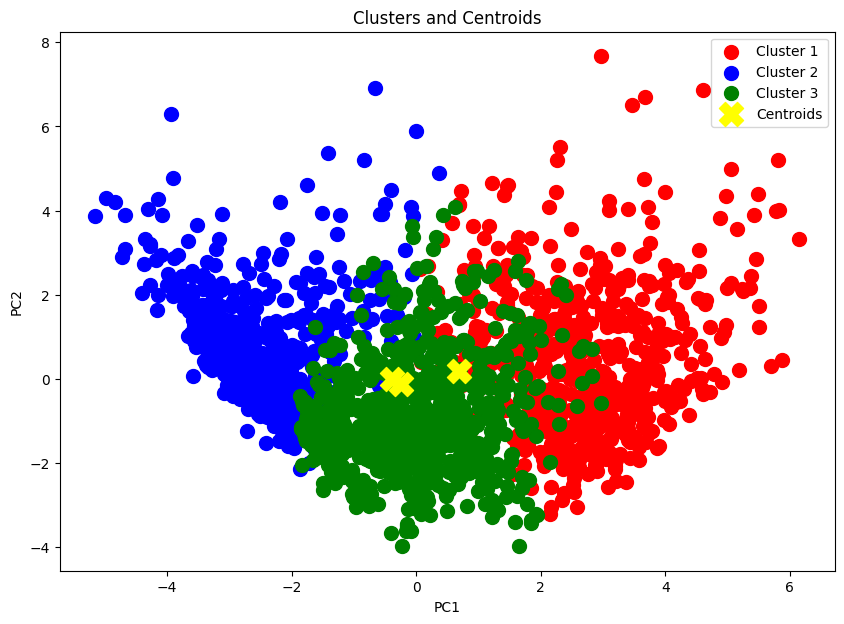

In [215]:

if df_pca.shape[1] > 2:
    df_pca_2d = df_pca[:, :2]
else:
    df_pca_2d = df_pca


df_plot = pd.DataFrame(data=df_pca_2d, columns=['PC1', 'PC2'])
df_plot['Cluster'] = clusters

# Plot the clusters
plt.figure(figsize=(10, 7))
plt.scatter(df_plot[df_plot['Cluster'] == 0]['PC1'], df_plot[df_plot['Cluster'] == 0]['PC2'], s=100, c='red', label='Cluster 1')
plt.scatter(df_plot[df_plot['Cluster'] == 1]['PC1'], df_plot[df_plot['Cluster'] == 1]['PC2'], s=100, c='blue', label='Cluster 2')
plt.scatter(df_plot[df_plot['Cluster'] == 2]['PC1'], df_plot[df_plot['Cluster'] == 2]['PC2'], s=100, c='green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids', marker='X')
plt.title('Clusters and Centroids')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()


[link text](https://)# Evaluate the Model

In [207]:
from sklearn.metrics import pairwise_distances_argmin_min

# Calculate WCSS
wcss = kmeans.inertia_
print(f'WCSS: {wcss}')


WCSS: 22404.62542807751


High WCSS: indicates that the data points are more dispersed within clusters

# Plot the data points with their predicted cluster center

> Add blockquote



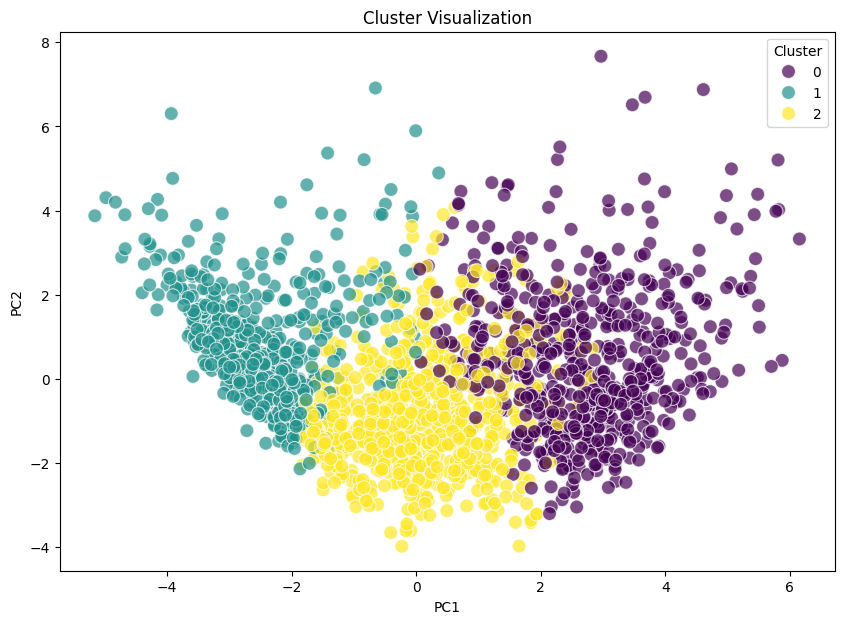

In [210]:
import seaborn as sns
df_plot = pd.DataFrame(data=df_pca_2d, columns=['PC1', 'PC2'])
df_plot['Cluster'] = clusters

# Plot
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_plot, palette='viridis', s=100, alpha=0.7)
plt.title('Cluster Visualization')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster')
plt.show()
